# Код для разложения в ряд Тейлора функции гиперболического косинуса

Сегодня я пишу код для разложения в ряд Тейлора функции гиперболического косинуса $x$:

$$\cosh x = \sum_{n=0}^N  \frac{x^{2n}}{(2n)!} + R(x) = 1+ \frac{x^{2}}{2!} + \frac{x^{4}}{4!} + \cdots$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [22]:
from math import cosh, factorial

ITERATIONS = 20 # очевидно, что с ростом числа итераций, точность будет расти

def my_ch(x):

    part_sum = 0

    for n in range(ITERATIONS):
        part_sum += (x**(2*n))/(factorial(2*n))

    return part_sum

n = 10

print(cosh(n))
print(my_ch(n))
print("Отклонение от python-овского гиперболического косинуса:", cosh(n)-my_ch(n))


11013.232920103323
11013.232920090313
Отклонение от python-овского гиперболического косинуса: 1.3009412214159966e-08


Как мы видим, в какой-то окрестнсти нуля, мы получаем значения, которые отличаются от python-вских настолько незначительно, что их разность округляется до нуля. 

Также наша функция работает и на множестве $\mathbb{C}$:

In [23]:
import cmath

complex_angle = cmath.acosh(5+3j)
print('"Значение x при котором ch(x) равен 5+3i', complex_angle) # а вообще, пишите туда, что хотите ))

print("Достигает ли пяти наш аркчойзуз?", my_ch(complex_angle)) # или как его правильно -- мне просто не хочется лишний раз писать гиперболический косинус
print("А библиотечный?", cmath.cosh(complex_angle))

"Значение x при котором ch(x) равен 5+3i (2.452913742502812+0.5469745802831137j)
Достигает ли пяти наш аркчойзуз? (4.999999999999999+3.0000000000000004j)
А библиотечный? (5+3j)


Построим график на интервале [-20;20], чтобы оценить то место, когда настоящий гиперболический косинус будет расти быстрее нашего

<function my_ch at 0x0C3A9B20> <numpy.vectorize object at 0x0C2ED4D8>


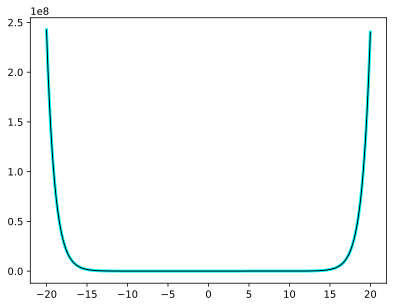

In [24]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg',  'pdf']
%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np

vs = np.vectorize(my_ch)
print(my_ch, vs)

angles = np.r_[-20.00:20.00:0.01]
plt.plot(angles, np.cosh(angles), linewidth=3.0, color='cyan')
plt.plot(angles, vs(angles), linewidth=1.0, color='black')
plt.show()

На основании графика делаем вывод, что нам удалось достаточно точно приблизить гиперболический косинус при помощи разложения в ряд Тейлора: погрешность порядка $10^{-8}$ будет еще при $x = 10$.